In [1]:
import matplotlib.pyplot as plt
import pandas as pd


### Binary Classification

In [2]:
df1 = pd.read_csv("E:/Data Science/ML/Logistic Regression/HR_comma_sep.csv")
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### Data Exploration and Visualization

In [3]:
left = df1[df1['left']==1]
left.shape

(3571, 10)

In [4]:
retained = df1[df1['left']==0]
retained.shape

(11428, 10)

In [5]:
df1.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above table we can draw following conclusions,

* **Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)
* **Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)
* **Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm

#### Impact of salary on employee retention

<AxesSubplot:xlabel='salary'>

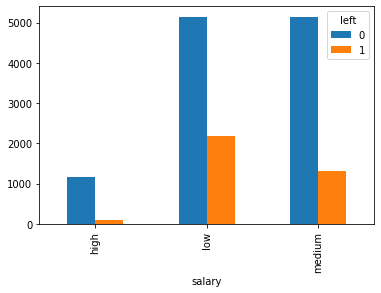

In [6]:
pd.crosstab(df1.salary,df1.left).plot(kind='bar')

Above bar chart shows employees with high salaries are likely to not leave the company

#### Department wise employee retention rate

<AxesSubplot:xlabel='Department'>

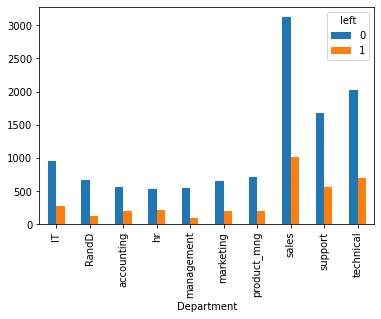

In [7]:
pd.crosstab(df1.Department,df1.left).plot(kind='bar')

From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis

#### From the data analysis so far we can conclude that we will use following variables as independant variables in our model
* **Satisfaction Level**
* **Average Monthly Hours**
* **Promotion Last 5 Years**
* **Salary**

In [8]:
subdf = df1[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
subdf['salary'] = le.fit_transform(subdf['salary'])
subdf.head()

C:\Users\bakul\AppData\Local\Temp/ipykernel_20400/1180091791.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf['salary'] = le.fit_transform(subdf['salary'])


,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,1
1,0.80,262,0,2
2,0.11,272,0,2
3,0.72,223,0,1
4,0.37,159,0,1


In [10]:
x=subdf
y=df1.left

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.2)

In [12]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()

In [13]:
model1.fit(x_train, y_train)

LogisticRegression()

In [14]:
model1.score(x_test,y_test)

0.7695833333333333

### Multiclass Classification

In [15]:
df = pd.read_csv('E:/Data Science/ML/Logistic Regression/IRIS.csv')

In [16]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [18]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<AxesSubplot:>

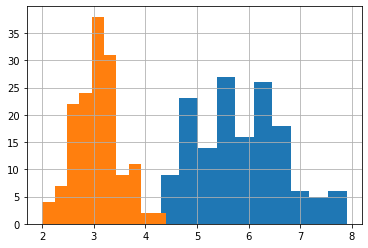

In [19]:
df['sepal_length'].hist()
df['sepal_width'].hist()

<AxesSubplot:>

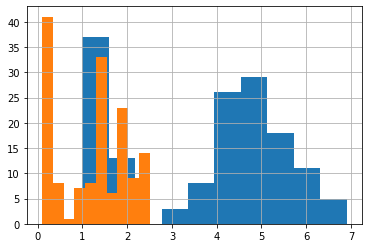

In [20]:
df['petal_length'].hist()
df['petal_width'].hist()

In [21]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [22]:

df['species'] = le.fit_transform(df['species'])
df.head(100)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


#### Creating and Training Logistic Regression Model

In [23]:
X = df.drop(columns = ['species'])
Y = df['species']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [24]:
model = LogisticRegression()

In [25]:
model.fit(X_train, Y_train)

LogisticRegression()

#### Measure Accuracy of our Model

In [26]:
model.score(X_test, Y_test)

0.9473684210526315

In [27]:
model.predict([[7,6,5,1.5]])

c:\python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])